In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

MedianHouseholdIncome2015.csv
PercentOver25CompletedHighSchool.csv
PercentagePeopleBelowPovertyLevel.csv
PoliceKillingsUS.csv
ShareRaceByCity.csv



In [3]:
median_house_hold_in_come = pd.read_csv('../input/MedianHouseholdIncome2015.csv', encoding="windows-1252")
percentage_people_below_poverty_level = pd.read_csv('../input/PercentagePeopleBelowPovertyLevel.csv', encoding="windows-1252")
percent_over_25_completed_highSchool = pd.read_csv('../input/PercentOver25CompletedHighSchool.csv', encoding="windows-1252")
share_race_city = pd.read_csv('../input/ShareRaceByCity.csv', encoding="windows-1252")
kill = pd.read_csv('../input/PoliceKillingsUS.csv', encoding="windows-1252")

In [4]:
percentage_people_below_poverty_level.head()

,Geographic Area,City,poverty_rate
0,AL,Abanda CDP,78.8
1,AL,Abbeville city,29.1
2,AL,Adamsville city,25.5
3,AL,Addison town,30.7
4,AL,Akron town,42


In [5]:
percentage_people_below_poverty_level.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
Geographic Area    29329 non-null object
City               29329 non-null object
poverty_rate       29329 non-null object
dtypes: object(3)
memory usage: 687.5+ KB


In [8]:
#percentage_people_below_poverty_level.poverty_rate.value_counts()


Text(0.5,1,'poverty Rate Given States')

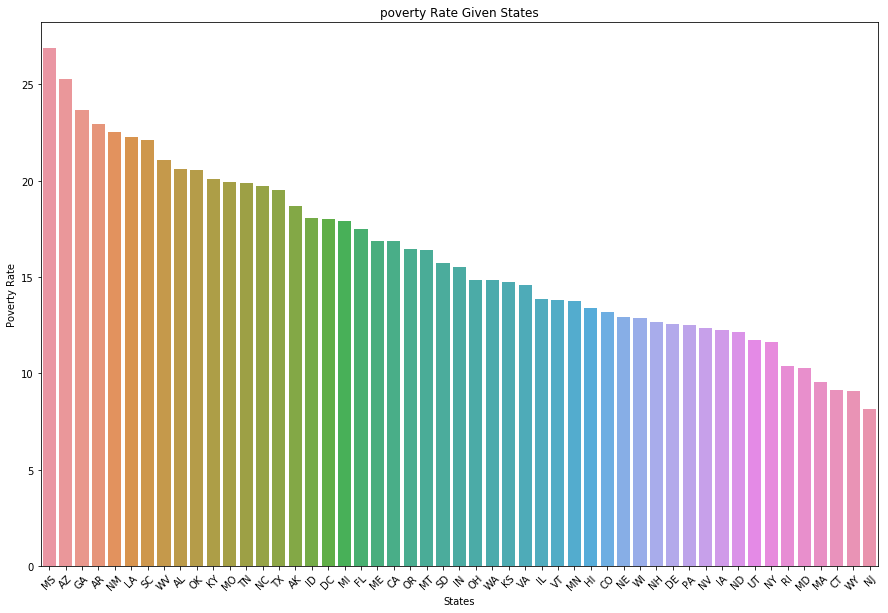

In [11]:
percentage_people_below_poverty_level.poverty_rate.replace(['-'],0.0, inplace=True)
#Shorting
percentage_people_below_poverty_level.poverty_rate = percentage_people_below_poverty_level.poverty_rate.astype(float)
area_list = list(percentage_people_below_poverty_level['Geographic Area'].unique())
area_poverty_ratio = []
for i in area_list:
    x = percentage_people_below_poverty_level[percentage_people_below_poverty_level['Geographic Area']==i]
    area_poverty_rate = sum(x.poverty_rate)/len(x)
    area_poverty_ratio.append(area_poverty_rate)
data = pd.DataFrame({'area_list':area_list,'area_poverty_ratio':area_poverty_ratio})
new_index = (data['area_poverty_ratio'].sort_values(ascending = False)).index.values
sorted_data = data.reindex(new_index)
# visualization

plt.figure(figsize=(15,10))
sns.barplot(x=sorted_data['area_list'],y = sorted_data['area_poverty_ratio'])
plt.xticks(rotation = 45)
plt.xlabel('States')
plt.ylabel('Poverty Rate')
plt.title('poverty Rate Given States')

In [12]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [15]:
kill.name.value_counts()

TK TK                           49
TK Tk                            2
Brandon Jones                    2
Michael Johnson                  2
Eric Harris                      2
Daquan Antonio Westbrook         2
Michael Brown                    2
Tristan Vilters                  1
Michael Caponigro                1
Bettie Jones                     1
Edelmiro Hernandez               1
Jamison Christopher Anderson     1
Dale Maverick Hudson             1
Redel Jones                      1
Ruben Horacio Strand Alvear      1
Saige Hack                       1
Charles Robert Shaw              1
John Barry Marshall              1
Stephen Connard Ferry            1
Jacqueline Cheyanne Johnson      1
Marco Romero                     1
Lonnie Haskell Powers            1
Scottie Yanagawa                 1
Shawn Clyde                      1
Walter R. Echols                 1
Damarius Butts                   1
Raymond Azevedo                  1
Melvin Faison                    1
Cedric Ford         

Text(0.5,1,'Most common 15 Name or Surname of killed people')

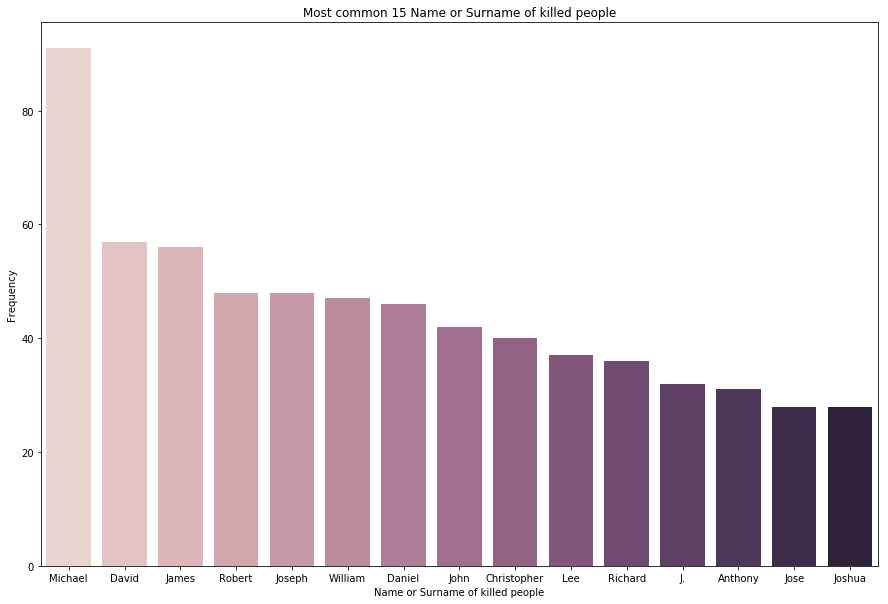

In [22]:
# En çok öldürülen 15 soyisime sahip insanlar
separate = kill.name[kill.name != 'TK TK'].str.split() 
a,b = zip(*separate)                    
name_list = a+b                         
name_count = Counter(name_list)         
most_common_names = name_count.most_common(15)  
x,y = zip(*most_common_names)
x,y = list(x),list(y)
# 
plt.figure(figsize=(15,10))
ax= sns.barplot(x=x, y=y,palette = sns.cubehelix_palette(len(x)))
plt.xlabel('Name or Surname of killed people')
plt.ylabel('Frequency')
plt.title('Most common 15 Name or Surname of killed people')

In [23]:
percent_over_25_completed_highSchool.head()

,Geographic Area,City,percent_completed_hs
0,AL,Abanda CDP,21.2
1,AL,Abbeville city,69.1
2,AL,Adamsville city,78.9
3,AL,Addison town,81.4
4,AL,Akron town,68.6


In [25]:
percent_over_25_completed_highSchool.percent_completed_hs.value_counts()

100     1301
-        197
91.7     170
92.9     169
92.5     168
91.3     163
89.3     162
93.8     161
93.2     160
92.1     159
91.9     158
92.7     158
92.2     157
93.4     156
90.9     156
89.7     153
89.4     150
91.1     150
93.9     150
90.2     149
91.6     148
91.5     147
88.1     146
93.6     146
92.6     146
90.4     145
89.1     145
94.3     144
92.4     142
89.5     142
        ... 
28.3       1
18         1
32.9       1
43.4       1
18.2       1
42.7       1
32.5       1
15.3       1
15.8       1
33.5       1
40.1       1
24.6       1
8.3        1
35.6       1
24         1
50.2       1
27.5       1
29.1       1
38.4       1
33.1       1
39.7       1
37.3       1
32.6       1
7.7        1
43.7       1
13.2       1
34         1
27.2       1
47.3       1
36.4       1
Name: percent_completed_hs, Length: 728, dtype: int64

In [26]:
percent_over_25_completed_highSchool.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
Geographic Area         29329 non-null object
City                    29329 non-null object
percent_completed_hs    29329 non-null object
dtypes: object(3)
memory usage: 687.5+ KB


Text(0.5,1,"Percentage of Given State's Population Above 25 that Has Graduated High School")

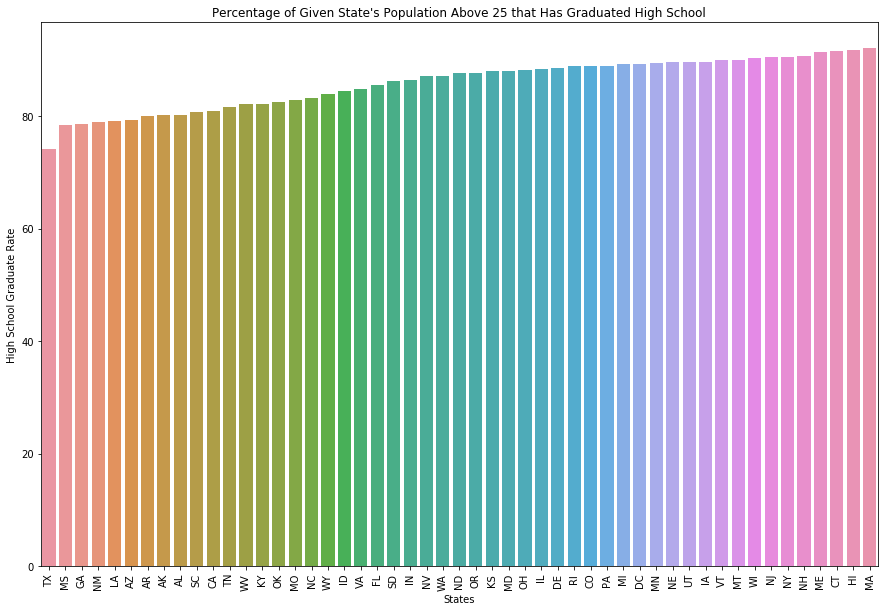

In [27]:
# Eyaletlerin 25 yaşından büyüklerin lise mezunu olma durumu

percent_over_25_completed_highSchool.percent_completed_hs.replace(['-'],0.0,inplace = True)
percent_over_25_completed_highSchool.percent_completed_hs = percent_over_25_completed_highSchool.percent_completed_hs.astype(float)
area_list = list(percent_over_25_completed_highSchool['Geographic Area'].unique())
area_highschool = []
for i in area_list: #unique verileri tek bir dizi içerisinde topluyoruz.
    x = percent_over_25_completed_highSchool[percent_over_25_completed_highSchool['Geographic Area']==i]
    area_highschool_rate = sum(x.percent_completed_hs)/len(x)
    area_highschool.append(area_highschool_rate)
# sorting

data = pd.DataFrame({'area_list': area_list,'area_highschool_ratio':area_highschool})
new_index = (data['area_highschool_ratio'].sort_values(ascending=True)).index.values # Artana göre sırala
sorted_data2 = data.reindex(new_index) 
# visualization

plt.figure(figsize=(15,10))
sns.barplot(x=sorted_data2['area_list'], y=sorted_data2['area_highschool_ratio'])
plt.xticks(rotation= 90)
plt.xlabel('States')
plt.ylabel('High School Graduate Rate')
plt.title("Percentage of Given State's Population Above 25 that Has Graduated High School")

In [29]:
share_race_city.head()

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.2,30.2,0,0,1.6
1,AL,Abbeville city,54.4,41.4,0.1,1,3.1
2,AL,Adamsville city,52.3,44.9,0.5,0.3,2.3
3,AL,Addison town,99.1,0.1,0,0.1,0.4
4,AL,Akron town,13.2,86.5,0,0,0.3


In [30]:
share_race_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29268 entries, 0 to 29267
Data columns (total 7 columns):
Geographic area          29268 non-null object
City                     29268 non-null object
share_white              29268 non-null object
share_black              29268 non-null object
share_native_american    29268 non-null object
share_asian              29268 non-null object
share_hispanic           29268 non-null object
dtypes: object(7)
memory usage: 1.6+ MB


[Text(0,0.5,'States'),
 Text(0.5,0,'Percentage of Races'),
 Text(0.5,1,"Percentage of State's Population According to Races ")]

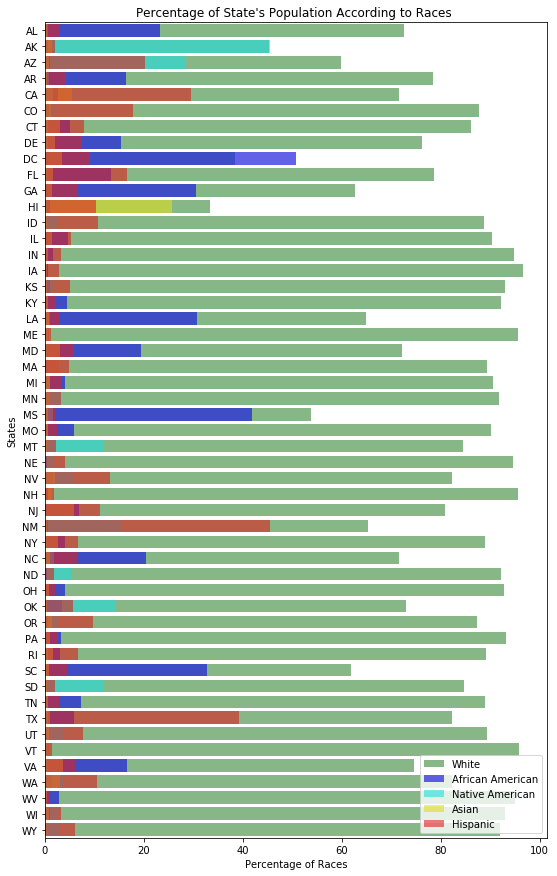

In [28]:
# Eyaletlerdeki insanları değerlendir 
share_race_city.replace(['-'],0.0,inplace = True)
share_race_city.replace(['(X)'],0.0,inplace = True)
share_race_city.loc[:,['share_white','share_black','share_native_american','share_asian','share_hispanic']] = share_race_city.loc[:,['share_white','share_black','share_native_american','share_asian','share_hispanic']].astype(float)
area_list = list(share_race_city['Geographic area'].unique())
share_white = []
share_black = []
share_native_american = []
share_asian = []
share_hispanic = []
for i in area_list:
    x = share_race_city[share_race_city['Geographic area']==i]
    share_white.append(sum(x.share_white)/len(x)) #eyaletlere göre ortalamayı buluyoruz.
    share_black.append(sum(x.share_black) / len(x))
    share_native_american.append(sum(x.share_native_american) / len(x))
    share_asian.append(sum(x.share_asian) / len(x))
    share_hispanic.append(sum(x.share_hispanic) / len(x))

# visualization
f,ax = plt.subplots(figsize = (9,15))
sns.barplot(x=share_white,y=area_list,color='green',alpha = 0.5,label='White' )
sns.barplot(x=share_black,y=area_list,color='blue',alpha = 0.7,label='African American')
sns.barplot(x=share_native_american,y=area_list,color='cyan',alpha = 0.6,label='Native American')
sns.barplot(x=share_asian,y=area_list,color='yellow',alpha = 0.6,label='Asian')
sns.barplot(x=share_hispanic,y=area_list,color='red',alpha = 0.6,label='Hispanic')

ax.legend(loc='lower right',frameon = True)     # legendlarin gorunurlugu
ax.set(xlabel='Percentage of Races', ylabel='States',title = "Percentage of State's Population According to Races ")